In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import pandas as pd
import seaborn as sns

In [2]:
def refresh_dataset(): # this function will help in refreshing the dataset everytime we need to plot new diagrams
  df = pd.read_csv('/content/Datasets_Project_Final - nibbler score (1).csv')
  return df

In [3]:
df = refresh_dataset()

In [4]:
df.isna().sum()

Blog                 0
Internal Links       0
Mobile               0
Headings             0
Page Titles          0
URL format           0
Amount of Content    0
Popularity           0
Freshness            2
Twitter              3
Images               0
Printability         0
Meta Tags            0
Server Behavior      0
Analytics            0
Overall              0
dtype: int64

In [5]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = df.drop(columns=['Blog'])
df = clean_dataset(df)

In [6]:
df.dtypes

Internal Links       float64
Mobile               float64
Headings             float64
Page Titles          float64
URL format           float64
Amount of Content    float64
Popularity           float64
Freshness            float64
Twitter              float64
Images               float64
Printability         float64
Meta Tags            float64
Server Behavior      float64
Analytics            float64
Overall              float64
dtype: object

In [7]:
df.head(10)

,Internal Links,Mobile,Headings,Page Titles,URL format,Amount of Content,Popularity,Freshness,Twitter,Images,Printability,Meta Tags,Server Behavior,Analytics,Overall
0,0.7,7.2,9.0,10.0,10.0,9.8,10.0,10.0,0.0,9.4,0.0,10.0,10.0,0.0,7.3
1,9.2,8.6,9.0,10.0,3.6,9.6,2.9,10.0,10.0,4.7,0.0,10.0,10.0,10.0,8.5
2,8.6,10.0,10.0,10.0,10.0,8.4,7.7,10.0,0.0,9.9,10.0,8.4,9.8,0.0,8.5
3,9.3,10.0,10.0,10.0,10.0,9.1,9.5,10.0,10.0,8.0,10.0,10.0,10.0,0.0,9.0
4,4.3,10.0,10.0,10.0,10.0,9.0,9.8,10.0,0.0,9.8,0.0,10.0,10.0,10.0,8.7
5,0.0,10.0,9.0,10.0,8.8,9.5,10.0,10.0,10.0,8.2,10.0,8.4,10.0,10.0,8.5
6,6.6,10.0,3.0,10.0,5.6,4.9,10.0,10.0,0.0,9.1,0.0,6.8,8.0,10.0,7.6
7,9.6,7.2,9.0,9.0,10.0,9.6,8.4,10.0,9.7,10.0,0.0,10.0,9.7,10.0,9.1
8,6.1,10.0,7.0,10.0,10.0,8.4,8.5,10.0,9.7,9.8,6.0,8.4,10.0,10.0,9.0
9,8.9,10.0,10.0,10.0,8.0,8.7,6.2,10.0,0.0,10.0,6.7,7.3,7.4,6.7,8.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 319
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Internal Links     315 non-null    float64
 1   Mobile             315 non-null    float64
 2   Headings           315 non-null    float64
 3   Page Titles        315 non-null    float64
 4   URL format         315 non-null    float64
 5   Amount of Content  315 non-null    float64
 6   Popularity         315 non-null    float64
 7   Freshness          315 non-null    float64
 8   Twitter            315 non-null    float64
 9   Images             315 non-null    float64
 10  Printability       315 non-null    float64
 11  Meta Tags          315 non-null    float64
 12  Server Behavior    315 non-null    float64
 13  Analytics          315 non-null    float64
 14  Overall            315 non-null    float64
dtypes: float64(15)
memory usage: 39.4 KB


In [9]:
col = df.columns

In [10]:
df.isna().sum()

Internal Links       0
Mobile               0
Headings             0
Page Titles          0
URL format           0
Amount of Content    0
Popularity           0
Freshness            0
Twitter              0
Images               0
Printability         0
Meta Tags            0
Server Behavior      0
Analytics            0
Overall              0
dtype: int64

In [11]:
df.head()

,Internal Links,Mobile,Headings,Page Titles,URL format,Amount of Content,Popularity,Freshness,Twitter,Images,Printability,Meta Tags,Server Behavior,Analytics,Overall
0,0.7,7.2,9.0,10.0,10.0,9.8,10.0,10.0,0.0,9.4,0.0,10.0,10.0,0.0,7.3
1,9.2,8.6,9.0,10.0,3.6,9.6,2.9,10.0,10.0,4.7,0.0,10.0,10.0,10.0,8.5
2,8.6,10.0,10.0,10.0,10.0,8.4,7.7,10.0,0.0,9.9,10.0,8.4,9.8,0.0,8.5
3,9.3,10.0,10.0,10.0,10.0,9.1,9.5,10.0,10.0,8.0,10.0,10.0,10.0,0.0,9.0
4,4.3,10.0,10.0,10.0,10.0,9.0,9.8,10.0,0.0,9.8,0.0,10.0,10.0,10.0,8.7


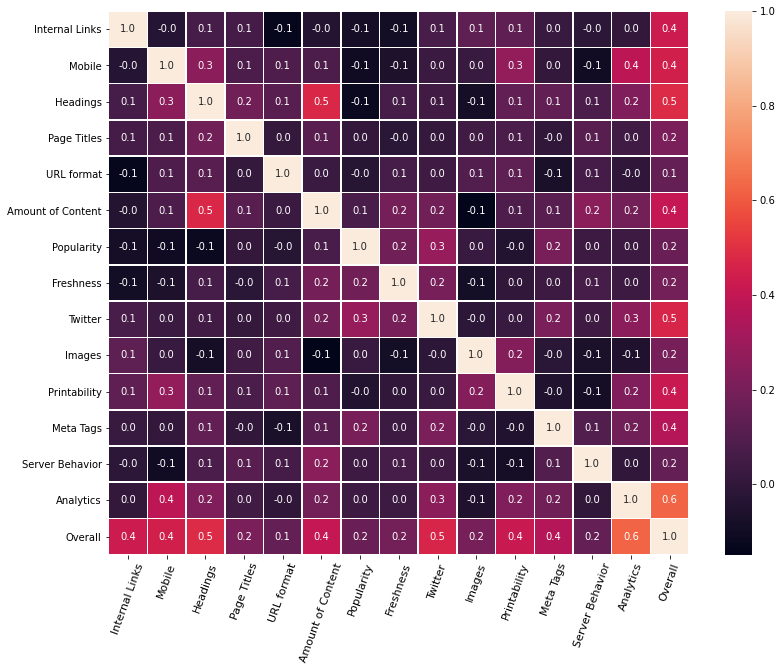

In [12]:
f,ax = plt.subplots(figsize=(13,10))
cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
sns.heatmap(df.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(fontsize=11,rotation=70)
plt.show()

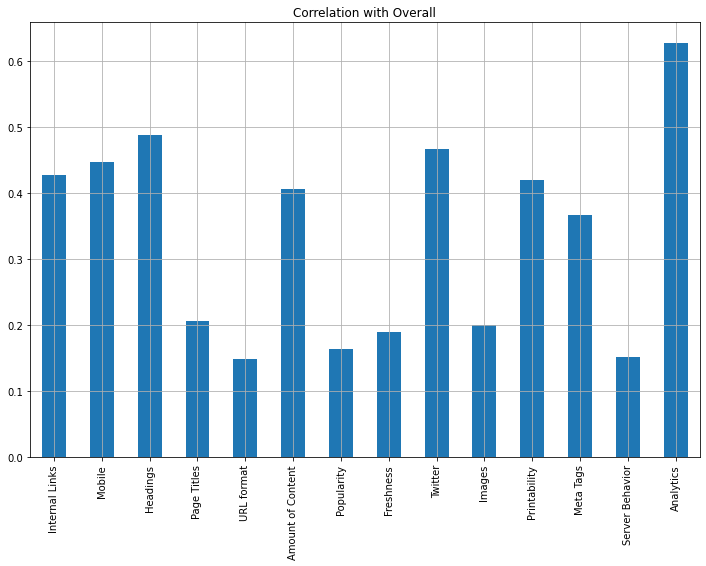

In [13]:
df.drop('Overall', axis=1).corrwith(df.Overall).plot(kind = 'bar', grid = True, 
                                                   figsize = (12, 8), 
                                                   title = "Correlation with Overall")

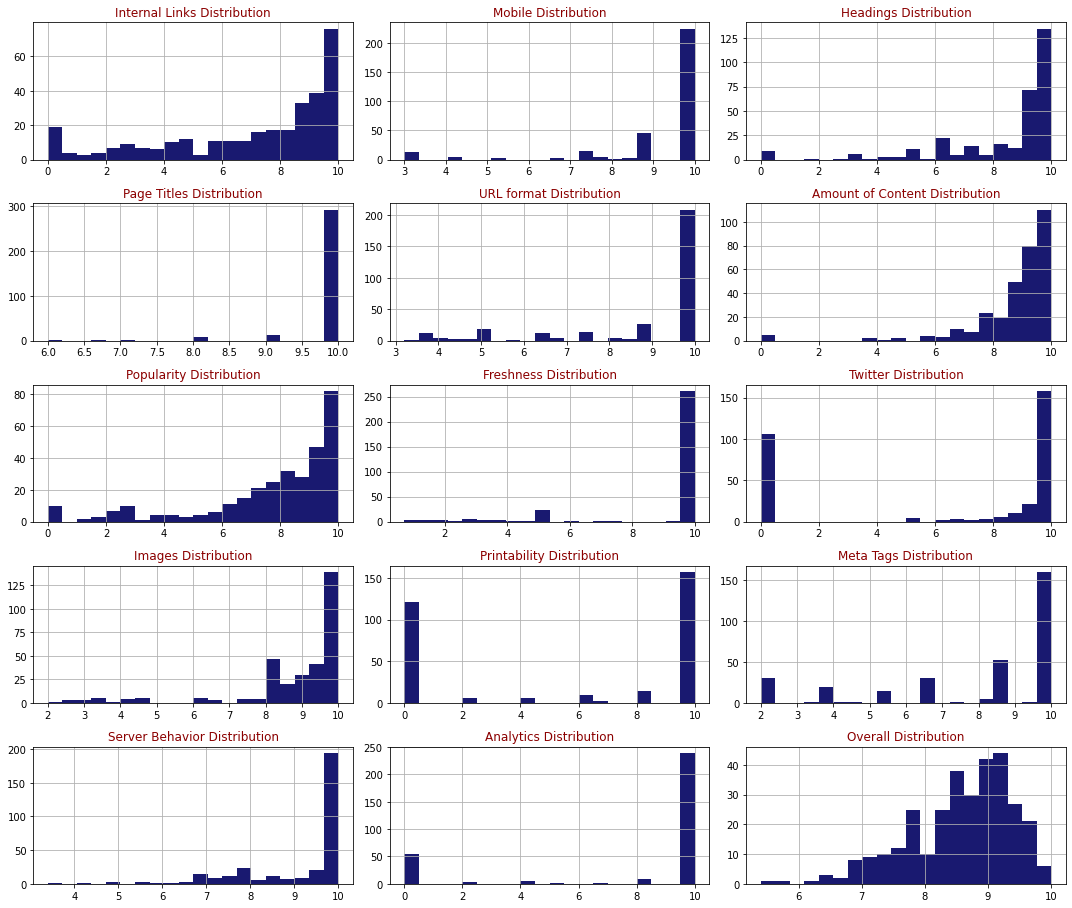

In [14]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(15,15))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()
    plt.show()
draw_histograms(df,df.columns,6,3)

In [15]:
data = df.values
x= data[:,0:14]   
y=data[:,14]          

In [16]:
print(y)

[ 7.3  8.5  8.5  9.   8.7  8.5  7.6  9.1  9.   8.2  8.1  9.5  8.1  8.6
  7.5  8.5  9.   9.1  9.2  7.7  9.   7.9  8.8  7.1  7.9  8.7  8.7  8.5
  8.   7.   9.2  9.   9.2  7.   8.4  9.1  9.7  8.7  9.3  8.8  8.6  9.9
  8.7  9.2  9.2  9.2  7.5  8.2  7.6  9.1  8.4  9.1  7.5  9.2  8.5  9.
  8.4  8.6  7.1  7.5  9.6  9.2  8.8  8.9  9.5  9.3  8.6  7.7  9.1  8.8
  9.6  8.7  9.4  9.5  8.4  7.4  8.5  8.   8.6  8.7  9.1  9.4  8.7  9.
  7.9  8.9  8.4 10.   9.4  9.2  7.7  8.9  9.4  9.7  9.1  7.1  9.1  7.3
  8.6  9.4  8.9  8.9  8.7  9.4  8.   8.8  7.9  8.5  9.4  8.2  8.   8.4
  9.1  7.   8.6  7.9  7.8  8.   9.   7.7  8.3  8.2  7.6  7.6  8.7  9.7
  8.6  7.2  9.2  9.1  9.2  8.6  8.7  8.2  6.8  7.5  8.5  6.6  7.1  8.8
  8.9  7.6  9.4  8.2  9.7  7.8  8.2  8.6  7.7  6.5  8.3  8.8  8.9  9.5
  9.7  9.2  9.4  7.8  9.5  9.   7.8  5.4  8.5  8.8  8.7  9.   7.   9.
  8.5  8.9  9.3  9.7  9.4  8.3  8.4  9.   9.   9.6  8.3  9.1  9.7  8.9
  8.7  9.4  8.9  9.2  7.8  9.2  8.8  9.9  9.3  8.9  9.2  9.5  9.4  9.9
  8.2  6.

In [17]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
clf = LinearRegression(normalize=True)
clf.fit(x,y)
y_pred = clf.predict(x)
print(r2_score(y,y_pred))
print(mean_squared_error(y, y_pred))
print(explained_variance_score(y, y_pred))

0.9822590516475751
0.011892891688843343
0.9822590516475751


In [18]:

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)
y_pred_svm = regressor.predict(x)
print(r2_score(y,y_pred_svm))
print(mean_squared_error(y, y_pred_svm))
print(explained_variance_score(y, y_pred_svm))

0.9760061645103514
0.01608460162386483
0.9760370894200464


In [19]:
from sklearn.tree import DecisionTreeRegressor
regressor2 = DecisionTreeRegressor(random_state = 0)
regressor2.fit(x, y)
y_pred_dtr = regressor2.predict(x)
print(r2_score(y,y_pred_dtr))
print(mean_squared_error(y, y_pred_dtr))
print(explained_variance_score(y, y_pred_dtr))

0.9953590713692739
0.0031111111111111127
0.9953590713692739


In [20]:
len(y_pred_dtr)

315

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor3 = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor3.fit(x, y)
y_pred_rfr = regressor3.predict(x)
print(r2_score(y,y_pred_rfr))
print(mean_squared_error(y, y_pred_rfr))
print(explained_variance_score(y, y_pred_rfr))


0.9651493752862057
0.02336260141093473
0.9655478507420692


In [22]:
list1=[['Linear Rregression',r2_score(y,y_pred),mean_squared_error(y, y_pred),explained_variance_score(y, y_pred)],['Support Vector Regression',r2_score(y,y_pred_svm),mean_squared_error(y, y_pred_svm),explained_variance_score(y, y_pred_svm)],['Decision Tree Regressor',r2_score(y,y_pred_dtr),mean_squared_error(y, y_pred_dtr),explained_variance_score(y, y_pred_dtr)],['Random Forest Regressor',r2_score(y,y_pred_rfr),mean_squared_error(y, y_pred_rfr),explained_variance_score(y, y_pred_rfr)]]
Comparision = pd.DataFrame(list1)
Comparision.columns = ['Regression model','R-Squared score','Root mean Squared Error','Explained variance Score']
Comparision 

,Regression model,R-Squared score,Root mean Squared Error,Explained variance Score
0,Linear Rregression,0.982259,0.011893,0.982259
1,Support Vector Regression,0.976006,0.016085,0.976037
2,Decision Tree Regressor,0.995359,0.003111,0.995359
3,Random Forest Regressor,0.965149,0.023363,0.965548


In [24]:
Comparision.to_csv("result.csv")